In [1]:
import numpy as np
import matplotlib.pyplot as plt

# General Code

### Plotting

In [2]:
def plot_decision_boundary(X,W,t):
    #plot classes
    plt.scatter(X[0,:], X[1,:], c=t[0,:])
    
    #plot line
    x = [-5,5]
    y = [line(x[0],W), line(x[1],W)]
    plt.plot(x, y)
    plt.ylim(-3, 3)
    plt.xlim(-3,3)
    plt.show()
    
def line(x,W):
    k = -(W.T[0]/W.T[1])
    m = -W.T[2]/W.T[1]
    return k*x+m

### Generating

In [3]:
def gen_binary(n = 100, bias = True):
    mA = [1.2, 0.7]
    mB = [-1.5, 0.0]
    sigmaA = 0.4
    sigmaB = 0.35
    
    classA1 = np.random.normal(mA[0],sigmaA,n) 
    classA2 = np.random.normal(mA[1],sigmaA,n)
    classA = np.vstack((classA1,classA2))
    labelA = np.ones((1,n))
    
    classB1 = np.random.normal(mB[0],sigmaB,n)
    classB2 = np.random.normal(mB[1],sigmaB,n)
    classB = np.vstack((classB1,classB2))
    labelB = -np.ones((1,n))
    
    data = np.hstack((classA,classB))
    labels = np.hstack((labelA,labelB))
    
    #shuffle and add bias
    X = np.zeros([3,2*n])
    t = np.zeros([1,2*n])
    index = np.random.permutation(2*n)
    
    for i in index:
        X[:2,i] = data[:2, index[i]]
        
        if bias:
            X[2,i] = 1
            
        t[0,i] = labels[0,index[i]]
    
    return X, t


def gen_nonlin_sep(n = 100, bias = True):
    mA = [1.0, 0.3]
    mB = [0.0, 0.0]
    sigmaA = 0.2
    sigmaB = 0.3
    
    classA1 = np.random.normal(mA[0],sigmaA,n) 
    classA2 = np.random.normal(mA[1],sigmaA,n)
    classA = np.vstack((classA1,classA2))
    labelA = np.ones((1,n))
    
    classB1 = np.random.normal(mB[0],sigmaB,n)
    classB2 = np.random.normal(mB[1],sigmaB,n)
    classB = np.vstack((classB1,classB2))
    labelB = -np.ones((1,n))
    
    data = np.hstack((classA,classB))
    labels = np.hstack((labelA,labelB))
    
    #shuffle and add bias
    X = np.zeros([3,2*n])
    t = np.zeros([1,2*n])
    index = np.random.permutation(2*n)
    
    for i in index:
        X[:2,i] = data[:2, index[i]]
        
        if bias:
            X[2,i] = 1
            
        t[0,i] = labels[0,index[i]]
    
    return X, t




def gen_W(X):
    W = np.random.normal(0, 1, (1, X.shape[0]))
    
    #bias
    if X[2,0] == 0:
        W.T[2] = 0
        
    return W

# Perceptron

In [28]:
def prediction(data, weight):
    activation = weight[len(data)-1]
    for i in range(len(data)-1):
        activation += weight[i]*data[i]
    if activation >=0:
        return 1.0
    else :
        return -1.0
    
def weight_update_perceptron(dataset, labels, lr, n_epoch):
    weights = np.zeros(len(dataset[0]))
    print('l = ',len(dataset[0]))
    for epoch in range(n_epoch):
        sum_error = 0.0
        for i in range(len(dataset)-1):
            data = dataset[:,i]
            p = prediction(data, weights)
            error = (labels[:,i] - p)/2
            sum_error += abs(error)
            #weights[len(data)-1] = weights[len(data)-1] + (lr* error)
            for j in range(len(data)-1):
                weights[j] = weights[j] + (lr*error*data[j])
        #print('epoch=%d, lr=%.3f, error=%.3f' % (epoch, lr, sum_error))
    return weights

#dataset, labels = gen_binary(5)
#dataset = np.transpose(dataset)
#w = weight_update_perceptron(dataset, labels, 0.1, 10)
#print("w = ", w)

# Delta Rule

In [29]:
def delta(W, x, t, eta):
    inner = np.dot(W,x) - t
    return eta * np.dot(inner, np.transpose(x))

def run_delta(W, X, T, eta, n_epochs):
    Wnew = W[:]
    for e in range(n_epochs):
        for i in range(X.shape[1]):
            x = X[:,i,None]
            t = T[:,i]
            Wnew = Wnew - delta(Wnew,x,t,eta)
    return Wnew

def run_delta_batch(W, X, T, eta, n_epochs):
    Wnew = W[:]
    for e in range(n_epochs):
        Wnew = Wnew - eta*np.dot((np.dot(Wnew,X)-T),X.T)
    return Wnew


# Experiments on Linearly Seperable Data

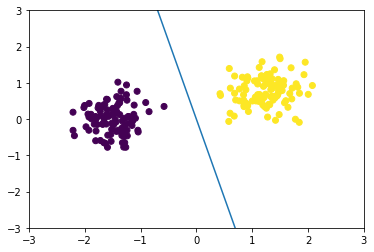

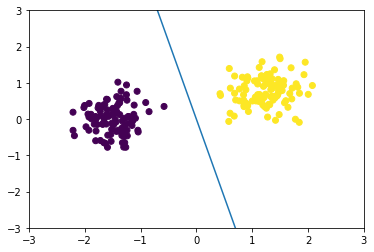

l =  200


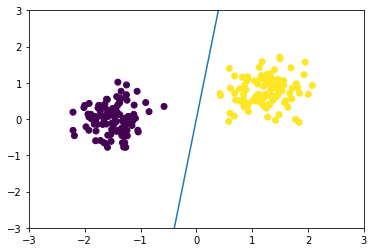

In [31]:
X, T = gen_binary(100, False)
W = gen_W(X)

W1 = run_delta(W,X,T,0.001,100)
plot_decision_boundary(X,W1,T)

W2 = run_delta_batch(W,X,T,0.001,10000)
plot_decision_boundary(X,W2,T)

W3 = weight_update_perceptron(X, T, 0.001, 10000)
plot_decision_boundary(X,W3,T)


# Experiments on Non-Linearly Seperable Data

In [7]:
data = gen_binary()